# 数据挖掘算法与应用实验1
学号：24B918010

姓名：王起凡

## 环境配置
1. 安装python。
2. 配置.ipynb文件的运行环境。在命令行中输入：pip install notebook或者pip install jupyterlab，之后在文件目录下输入jupyter notebook
或jupyter lab即可启动 Jupyter 环境。
3. 安装相关库，在命令行中输入：pip install pandas numpy matplotlib scikit-learn openpyxl xlsxwriter。
## 要求
请将单元格内容补全，并输出执行结果

In [1]:
import pandas as pd
import numpy as np

In [2]:
from pandas import Series, DataFrame

# 创建Series

In [6]:
#Series是一种类似于一维数组的对象，它由一组数据（各种NumPy数据类型）以及一组与之相关的数据标签（即索引）组成。
#你可以自己定义一个列表，并使用它创建Series，命名为obj。
#TODO
data = [0.4, -71000, -1600, 500]
# 创建Series
obj = pd.Series(data)

In [7]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
#如果数据被存放在一个Python字典中，也可以直接通过这个字典来创建Series：
#TODO
obj = pd.Series(sdata)

In [8]:
#如果只传入一个字典，则结果Series中的索引就是原字典的键（有序排列）。你可以传入排好序的字典的键以改变顺序：
states = ['California', 'Ohio', 'Oregon', 'Texas']
#你可以创建series的时候将键值指定为states
#TODO
obj = pd.Series(sdata, index=states)

In [ ]:
#针对上一个单元格的执行结果，使用缺失（missing）或NA表示缺失数据。pandas的isnull和notnull函数可用于检测缺失数据：
#TODO
print(obj.isnull())  
print(obj.notnull())  

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool
California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool


In [5]:
#输出大于0的所有obj
#TODO
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
filtered_data = {key: value for key, value in sdata.items() if value > 0}
print(filtered_data)

{'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}


# 创建dataframe
DataFrame是一个表格型的数据结构，它含有一组有序的列，每列可以是不同的值类型（数值、字符串、布尔值等）。DataFrame既有行索引也有列索引，它可以被看做由Series组成的字典（共用同一个索引）。DataFrame中的数据是以一个或多个二维块存放的（而不是列表、字典或别的一维数据结构）。

In [10]:
#建DataFrame的办法有很多，最常用的一种是直接传入一个由等长列表或NumPy数组组成的字典：
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}


In [11]:
#使用data创建一个dataframe，将其命名为frame
#TODO
frame = pd.DataFrame(data)

In [12]:
#使用dataframe.head()函数查看frame首部的几行。
#TODO
print(frame.head())

    state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9


In [13]:
#如果传入的列在数据中找不到，就会在结果中产生缺失值：
#使用data创建一个dataframe，指定columns为['year', 'state', 'pop', 'debt']，索引为['one', 'two', 'three', 'four','five', 'six']，并将结果保存为frame2
#TODO
columns = ['year', 'state', 'pop', 'debt']
index = ['one', 'two', 'three', 'four', 'five', 'six']
frame_check = pd.DataFrame(data, columns=columns, index=index)
print(frame_check)

       year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN
six    2003  Nevada  3.2  NaN


In [14]:
#列可以通过赋值的方式进行修改。例如，针对frame2，我们可以给那个空的"debt"列赋上一个标量值或一组值：
#TODO
frame_check['debt'] = 10
print(frame_check)

       year   state  pop  debt
one    2000    Ohio  1.5    10
two    2001    Ohio  1.7    10
three  2002    Ohio  3.6    10
four   2001  Nevada  2.4    10
five   2002  Nevada  2.9    10
six    2003  Nevada  3.2    10


In [ ]:
#我们可以为一个不存在的列赋值来创建一个新的列，关键字del用于删除列。
#作为del的例子，针对frame2，我们先添加一个新的布尔值的列，判断state是否为'Ohio'：
#TODO
frame_check['isnor_check_ohio'] = frame_check['state'] == 'Ohio'
frame2 = frame_check
print(frame_check)

       year   state  pop  debt  from_ohio  isnor_check_ohio
one    2000    Ohio  1.5    10       True              True
two    2001    Ohio  1.7    10       True              True
three  2002    Ohio  3.6    10       True              True
four   2001  Nevada  2.4    10      False             False
five   2002  Nevada  2.9    10      False             False
six    2003  Nevada  3.2    10      False             False


In [20]:
#del关键字可以删除这个列，针对frame2，请用del删除列'eastern'
#TODO
# del frame_check['from_ohio']
# print(frame_check)
# del frame_check['eastern']
print(frame_check)

       year   state  pop  debt  isnor_check_ohio
one    2000    Ohio  1.5    10              True
two    2001    Ohio  1.7    10              True
three  2002    Ohio  3.6    10              True
four   2001  Nevada  2.4    10             False
five   2002  Nevada  2.9    10             False
six    2003  Nevada  3.2    10             False


In [22]:
#另一种常见的数据形式是嵌套字典：
pop = {'Nevada': {2001: 2.4, 2002: 2.9},'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
#如果嵌套字典传给DataFrame，pandas就会被解释为：外层字典的键作为列，内层键则作为行索引：
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [23]:
#你也可以使用类似NumPy数组（Array.T）的方法，对frame3进行转置（交换行和列），
#TODO
frame3_try_transpose = frame3.T
print(frame3_try_transpose)

        2001  2002  2000
Nevada   2.4   2.9   NaN
Ohio     1.7   3.6   1.5


In [24]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [26]:
#使用reindex函数对obj重新索引使得索引顺序更换为'a','b','c','d'
#TODO
obj_try_reindex = obj.reindex(['a', 'b', 'c', 'd'])
print(obj_try_reindex)

a   -5.3
b    7.2
c    3.6
d    4.5
dtype: float64


In [19]:
# frame

In [36]:
#针对frame，使用drop函数删除行为'Colorado', 'Ohio'的行，将结果保存为frame4。
#TODO
frame_test = pd.DataFrame(frame_check, index=['one', 'two', 'three', 'four', 'five', 'six'])
frame_test = frame_test.set_index('state')#.T
frame4 = frame_test.drop(['Ohio'])
print(frame_test)
print(frame4)

        year  pop  debt  isnor_check_ohio
state                                    
Ohio    2000  1.5    10              True
Ohio    2001  1.7    10              True
Ohio    2002  3.6    10              True
Nevada  2001  2.4    10             False
Nevada  2002  2.9    10             False
Nevada  2003  3.2    10             False
        year  pop  debt  isnor_check_ohio
state                                    
Nevada  2001  2.4    10             False
Nevada  2002  2.9    10             False
Nevada  2003  3.2    10             False


In [41]:
#针对frame4，通过设置参数axis=1删除列名为'two'的列。
#TODO
print(frame_check)
frame_hang = frame_check.T
print(frame_hang)
frame_delete_lie = frame_hang.drop(['two'], axis=1)
print(frame_delete_lie)

       year   state  pop  debt  isnor_check_ohio
one    2000    Ohio  1.5    10              True
two    2001    Ohio  1.7    10              True
three  2002    Ohio  3.6    10              True
four   2001  Nevada  2.4    10             False
five   2002  Nevada  2.9    10             False
six    2003  Nevada  3.2    10             False
                   one   two three    four    five     six
year              2000  2001  2002    2001    2002    2003
state             Ohio  Ohio  Ohio  Nevada  Nevada  Nevada
pop                1.5   1.7   3.6     2.4     2.9     3.2
debt                10    10    10      10      10      10
isnor_check_ohio  True  True  True   False   False   False
                   one three    four    five     six
year              2000  2002    2001    2002    2003
state             Ohio  Ohio  Nevada  Nevada  Nevada
pop                1.5   3.6     2.4     2.9     3.2
debt                10    10      10      10      10
isnor_check_ohio  True  True   False  

In [42]:
#Series索引（obj[...]）的工作方式类似于NumPy数组的索引，只不过Series的索引值不只是整数。下面是几个例子：
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
#请选择obj中索引为 'b'、'a' 和 'd' 的元素
#TODO
selected_1 = obj[['b', 'a', 'd']]
print(selected_1)
#请选择obj中所有小于 2 的元素
#TODO
selected_2 = obj[obj < 2]
print(selected_2)
#请使用切片操作选择obj中从索引 'b' 到 'c' 的元素
#TODO
selected_3 = obj['b':'c']
print(selected_3)
#请使用切片操作将obj中从索引 'b' 到 'c' 的元素赋值为 5
#TODO
obj['b':'c'] = 5
print(obj)

b    1.0
a    0.0
d    3.0
dtype: float64
a    0.0
b    1.0
dtype: float64
b    1.0
c    2.0
dtype: float64
a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64


In [43]:
#另一种用法是通过布尔条件（比如下面这个由标量比较运算得出的）进行索引：
#针对frame，使用布尔条件筛选出 pop 列大于 2 的行
#TODO
frame_shaixuan1 = frame[frame['pop'] > 2]
print(frame_shaixuan1)

    state  year  pop
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
5  Nevada  2003  3.2


In [44]:
#作为一个初步示例，让我们通过标签选择一行和多列：
#针对frame，使用 loc 操作访问 frame 中第 2 行的 state 和 year 列
#TODO
frame_shaixuan2 = frame.loc[1, ['state', 'year']]
print(frame_shaixuan2)

state    Ohio
year     2001
Name: 1, dtype: object


In [45]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],index=['a', 'c', 'e', 'f', 'g'])
#将s1和s2通过"+"相加
#TODO
s_add = s1 + s2
print(s_add)

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64


In [46]:
#使用s1的add函数执行加法，传入s2以及一个fill_value参数：
#TODO
s_change = s1.add(s2, fill_value=0)
print(s_change)

a    5.2
c    1.1
d    3.4
e    0.0
f    4.0
g    3.1
dtype: float64


In [47]:
#分别使用rdiv函数和"/"，将s1中的值取倒数。
#TODO
s1_change_rdiv = s1.rdiv(1)
# 使用 "/" 
s1_change_div = 1 / s1
# 输出结果
print(s1_change_rdiv)
print(s1_change_div)

a    0.136986
c   -0.400000
d    0.294118
e    0.666667
dtype: float64
a    0.136986
c   -0.400000
d    0.294118
e    0.666667
dtype: float64


In [48]:
dog_info = {
    'name': ['Buddy', 'Bella', 'Max', 'Lucy', 'Charlie', 'Daisy', 'Buddy', 'Max'],
    'year': [2015, 2017, 2016, 2018, 2015, 2019, 2015, 2016],  # 狗的出生年份
    'weight_kg': [7.5, 6.3, 8.0, 5.4, 9.2, 4.8, 7.5, 8.0],  # 狗的体重（单位：千克）
    'height_cm': [60, 55, 65, 50, 70, 45, 60, 65],  # 狗的身高（单位：厘米）
    'breed': ['Labrador', 'Beagle', 'Bulldog', 'Poodle', 'Golden Retriever', 'Dachshund', 'Labrador', 'Bulldog']  # 狗的品种
}
dogs = pd.DataFrame(dog_info)
# 将狗的身高从厘米转换为米，并添加为新列height_m
#TODO
dogs['height_m'] = dogs['height_cm'] / 100
print(dogs)

      name  year  weight_kg  height_cm             breed  height_m
0    Buddy  2015        7.5         60          Labrador      0.60
1    Bella  2017        6.3         55            Beagle      0.55
2      Max  2016        8.0         65           Bulldog      0.65
3     Lucy  2018        5.4         50            Poodle      0.50
4  Charlie  2015        9.2         70  Golden Retriever      0.70
5    Daisy  2019        4.8         45         Dachshund      0.45
6    Buddy  2015        7.5         60          Labrador      0.60
7      Max  2016        8.0         65           Bulldog      0.65


In [49]:
#针对dogs，使用drop_duplicates和其中的subset参数删除 name 和 breed 列相同重复的行，这里属性值name和breed的取值可能有多种组合
#TODO
dogs_delete = dogs.drop_duplicates(subset=['name', 'breed'])

print(dogs_delete)

      name  year  weight_kg  height_cm             breed  height_m
0    Buddy  2015        7.5         60          Labrador      0.60
1    Bella  2017        6.3         55            Beagle      0.55
2      Max  2016        8.0         65           Bulldog      0.65
3     Lucy  2018        5.4         50            Poodle      0.50
4  Charlie  2015        9.2         70  Golden Retriever      0.70
5    Daisy  2019        4.8         45         Dachshund      0.45


# Dataframe与Series的运算

In [30]:
#跟不同维度的NumPy数组一样，DataFrame和Series之间算术运算也是有明确规定的。先来看一个具有启发性的例子，计算一个二维数组与其某行之间的差：
arr = np.arange(12.).reshape((3, 4))
print(arr)
print(arr[0])
print(arr - arr[0])

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
[0. 1. 2. 3.]
[[0. 0. 0. 0.]
 [4. 4. 4. 4.]
 [8. 8. 8. 8.]]


In [50]:
#当我们从arr减去arr[0]，每一行都会执行这个操作。这就叫做广播（broadcasting），DataFrame和Series之间的运算差不多也是如此：
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),columns=list('bde'),index=['Utah', 'Ohio', 'Texas', 'Oregon'])
#使用iloc[]获取frame的第0行
#TODO
first_row = frame.iloc[0]
print(first_row)
#对 frame 中的每一行减去 series
#TODO
frame_sub = frame - first_row
print(frame_sub)

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64
          b    d    e
Utah    0.0  0.0  0.0
Ohio    3.0  3.0  3.0
Texas   6.0  6.0  6.0
Oregon  9.0  9.0  9.0


In [51]:
#针对dogs，统计每个breed类别的数量
#设置参数normalize=True将计数转化为占整体的比例
#TODO
breed_counts = dogs['breed'].value_counts(normalize=True)
print(breed_counts)

breed
Labrador            0.250
Bulldog             0.250
Beagle              0.125
Poodle              0.125
Golden Retriever    0.125
Dachshund           0.125
Name: proportion, dtype: float64


# 数据的聚合与分组计算

In [52]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],'key2' : ['one', 'two', 'one', 'two', 'one'],'data1' : np.random.randn(5),'data2' : np.random.randn(5)})
#通过 groupby() 对 data1 按照 key1 分组,并计算data1的均值。
#TODO
key1_grouped = df.groupby('key1')['data1'].mean()
print(key1_grouped)

key1
a   -0.042201
b    1.488068
Name: data1, dtype: float64


In [56]:
#针对df，请使用 mean() 函数计算按 key1 分组后的 每个key1值的均值
#TODO
key1_grouped_mean = df.groupby('key1')['data1'].mean()
print(key1_grouped_mean)

key1
a   -0.042201
b    1.488068
Name: data1, dtype: float64


In [57]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [58]:
#你也可以通过透视表来实现和聚合操作相同的功能。默认是mean
#针对df，请使用 DataFrame.pivot_table() 函数创建透视表，并指定 索引 为 key1，值 为 data1
#TODO
pivot_table_result = df.pivot_table(values='data1', index='key1')
print(pivot_table_result)

         data1
key1          
a    -0.042201
b     1.488068


In [59]:
#针对df，请使用 DataFrame.pivot_table() 函数创建透视表，并指定索引为 key1，列为 key2，值为 data1，并使用 aggfunc参数 计算 data1 的均值和中位数
#TODO
pivot_table_result1 = df.pivot_table(values='data1', index='key1', columns='key2', aggfunc=['mean', 'median'])
print(pivot_table_result1)

          mean              median          
key2       one       two       one       two
key1                                        
a     0.356672 -0.839947  0.356672 -0.839947
b     0.279077  2.697058  0.279077  2.697058


In [60]:
#针对df, 请使用 DataFrame.pivot_table() 函数创建透视表，并指定索引为 key1，列为 key2，值为 data1
#TODO
pivot_table_result3 = df.pivot_table(values='data1', index='key1', columns='key2')
print(pivot_table_result3)

key2       one       two
key1                    
a     0.356672 -0.839947
b     0.279077  2.697058


# 多层索引

In [63]:
df

,key1,key2,data1,data2
0,a,one,1.592094,-0.456736
1,a,two,-0.839947,1.258278
2,b,one,0.279077,0.888259
3,b,two,2.697058,1.083462
4,a,one,-0.878750,0.513740


In [64]:
#针对df，使用set_index函数将key1列设置为索引,并将结果保存为df2
#TODO
df2 = df.set_index('key1')
print(df2)

     key2     data1     data2
key1                         
a     one  1.592094 -0.456736
a     two -0.839947  1.258278
b     one  0.279077  0.888259
b     two  2.697058  1.083462
a     one -0.878750  0.513740


In [65]:
#针对df，使用set_index函数将key1、key2列设置为多层索引，并将结果保存为df2
#TODO
df2 = df.set_index(['key1', 'key2'])
print(df2)

              data1     data2
key1 key2                    
a    one   1.592094 -0.456736
     two  -0.839947  1.258278
b    one   0.279077  0.888259
     two   2.697058  1.083462
a    one  -0.878750  0.513740


In [66]:
#针对df2，使用loc函数访问由多层索引key1、key2确定的行,请输出key1='a',key2='one'的结果：
#TODO
result_suoyin = df2.loc[('a', 'one')]
print(result_suoyin)

              data1     data2
key1 key2                    
a    one   1.592094 -0.456736
     one  -0.878750  0.513740


C:\Users\25843\AppData\Local\Temp\ipykernel_16528\2793627530.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  result_suoyin = df2.loc[('a', 'one')]


In [ ]:
#请使用sort_index对 df2 按索引进行排序
#TODO
df2_sorted_paixu = df2.sort_index()
print(df2_sorted_paixu)

              data1     data2
key1 key2                    
a    one   1.592094 -0.456736
     one  -0.878750  0.513740
     two  -0.839947  1.258278
b    one   0.279077  0.888259
     two   2.697058  1.083462


In [73]:
#使用.loc和.iloc进行切片和子集化
#使用loc[] 索引器中“切片”操作从具有多重索引的 df2 中获取所有 key1 为 'a' 的行，包括 'a' 这一行及其之前的所有行。
#TODO
result_loc = df2_sorted_paixu.loc[:'a']
print(result_loc)

              data1     data2
key1 key2                    
a    one   1.592094 -0.456736
     one  -0.878750  0.513740
     two  -0.839947  1.258278


In [74]:
#除此之外，你也可以使用iloc进行切片，iloc只有两个参数分别代表行和列的切片。请注意iloc的切片是不包括尾元素的。
#针对df2，使用 iloc[] 从 DataFrame 中选择第 2 到第 4 行（索引 2, 3, 4）和第 1 到第 3 列（索引 1, 2, 3）的数据
#TODO
result_iloc = df2_sorted_paixu.iloc[2:5, 1:4]
print(result_iloc)

              data2
key1 key2          
a    two   1.258278
b    one   0.888259
     two   1.083462


In [75]:
#针对df2，pilot_table其实只是带有排序索引的dataframe因此你可以同样在pilot_table上达成这一操作：
#TODO
pivot_table_result = df2.pivot_table(values='data1', index='key1', columns='key2')
print(pivot_table_result)
result_loc = pivot_table_result.loc['a']
print(result_loc)
result_iloc = pivot_table_result.iloc[1:3, 0:2]
print(result_iloc)

key2       one       two
key1                    
a     0.356672 -0.839947
b     0.279077  2.697058
key2
one    0.356672
two   -0.839947
Name: a, dtype: float64
key2       one       two
key1                    
b     0.279077  2.697058


# 两个dataframe合并

In [76]:
#数据库风格的DataFrame合并
#数据集的合并（merge）或连接（join）运算是通过一个或多个键将行连接起来的。这些运算是关系型数据库（基于SQL）的核心。
#pandas的merge函数是对数据应用这些算法的主要切入点。
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],'data2': range(3)})

#请使用merge操作合并df1和df2，你可以通过on参数指定合并所用的键
#TODO
df_add = pd.merge(df1, df2, on='key')
print(df_add)

  key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0


In [77]:
#两个列列名不同，可以人为指定合并使用的左键和右键
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],'data2': range(3)})
#请使用 left_on='lkey' 和 right_on='rkey' 参数尝试合并 df3 和 df4
#TODO
df_add_34 = pd.merge(df3, df4, left_on='lkey', right_on='rkey')
print(df_add_34)

  lkey  data1 rkey  data2
0    b      0    b      1
1    b      1    b      1
2    b      6    b      1
3    a      2    a      0
4    a      4    a      0
5    a      5    a      0


# pandas可视化

In [78]:
import matplotlib.pyplot as plt

breed
Beagle              6.533333
Boxer               6.550000
Bulldog             8.500000
Cocker Spaniel      8.250000
Dachshund           6.466667
Golden Retriever    7.833333
Labrador            7.766667
Poodle              5.933333
Rottweiler          5.800000
Shih Tzu            6.400000
Name: weight_kg, dtype: float64


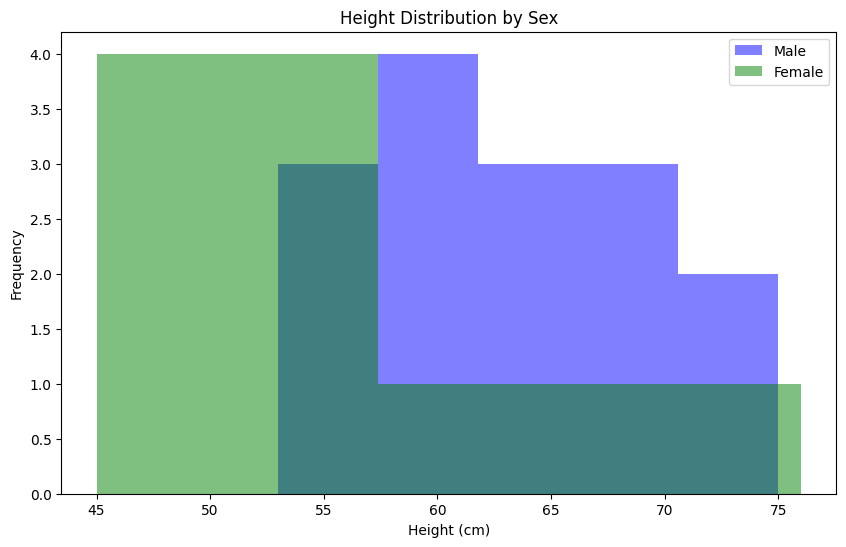

In [83]:
dog_info = {
    'name': ['Buddy', 'Bella', 'Max', 'Lucy', 'Charlie', 'Daisy', 'Rocky', 'Milo', 'Sadie', 'Oscar',
             'Cooper', 'Maggie', 'Toby', 'Luna', 'Jack', 'Zoe', 'Duke', 'Lily', 'Buster', 'Rex',
             'Ruby', 'Sam', 'Dolly', 'Jake', 'Chloe', 'Maximus'],
    'year': [2015, 2017, 2016, 2018, 2015, 2019, 2016, 2018, 2017, 2020,
             2014, 2016, 2017, 2018, 2015, 2019, 2020, 2021, 2016, 2017,
             2015, 2016, 2018, 2019, 2020, 2021],
    'weight_kg': [7.5, 6.3, 8.0, 5.4, 9.2, 4.8, 7.8, 6.5, 6.2, 5.5, 
                  8.5, 6.7, 9.0, 5.2, 7.0, 5.3, 10.0, 5.8, 6.1, 8.2, 
                  7.3, 6.6, 5.4, 9.1, 7.2, 6.4],
    'height_cm': [60, 55, 65, 50, 70, 45, 58, 54, 52, 63, 
                  68, 56, 72, 48, 62, 47, 75, 58, 53, 69,
                  64, 59, 54, 76, 61, 57],
    'breed': ['Labrador', 'Beagle', 'Bulldog', 'Poodle', 'Golden Retriever', 'Dachshund', 'Boxer', 'Cocker Spaniel', 'Shih Tzu', 'Rottweiler',
              'Labrador', 'Beagle', 'Bulldog', 'Golden Retriever', 'Poodle', 'Boxer', 'Cocker Spaniel', 'Shih Tzu', 'Rottweiler', 'Dachshund',
              'Labrador', 'Beagle', 'Poodle', 'Golden Retriever', 'Shih Tzu', 'Dachshund'],
    'sex': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 
            'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'M',
            'F', 'M', 'M', 'F', 'M', 'F']
}
# 创建 DataFrame
dog_pack = pd.DataFrame(dog_info)

# 使用 pandas 和 matplotlib 来绘制两个性别直方图，展示 dog_pack 数据集中不同性别狗的身高分布，并计算每个品种的平均体重
#TODO
plt.figure(figsize=(10, 6))
# 男性狗
dog_pack[dog_pack['sex'] == 'M']['height_cm'].plot(kind='hist', alpha=0.5, bins=5, label='Male', color='blue')
# 女性狗
dog_pack[dog_pack['sex'] == 'F']['height_cm'].plot(kind='hist', alpha=0.5, bins=5, label='Female', color='green')
plt.title('Height Distribution by Sex')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.legend()
# plt.show()
average_weight = dog_pack.groupby('breed')['weight_kg'].mean()
print(average_weight)

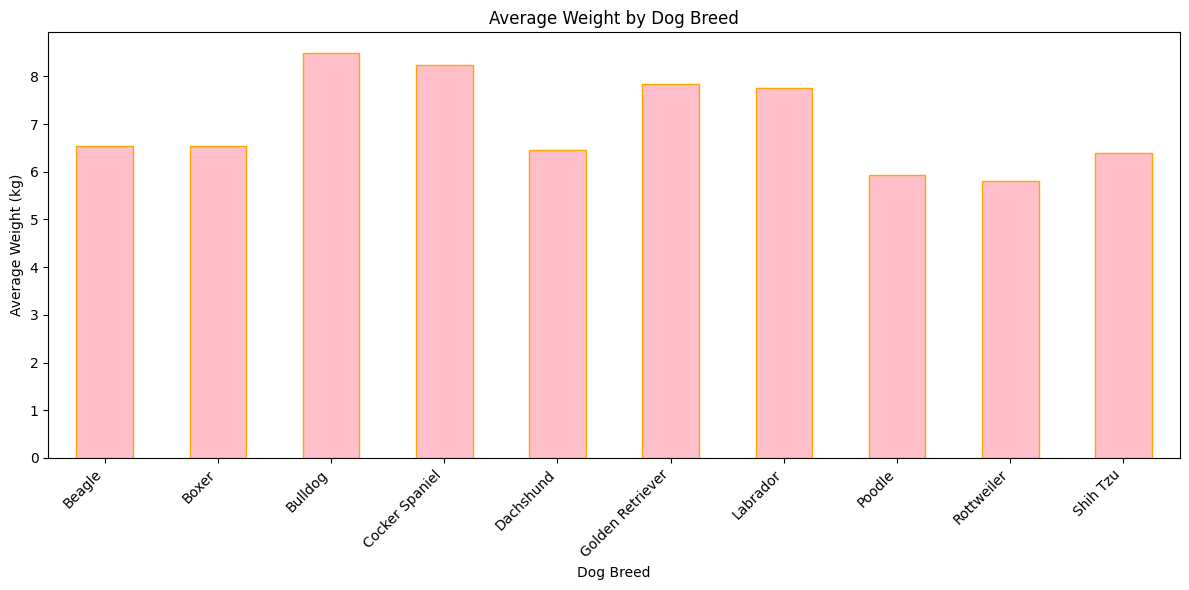

In [86]:
#绘制条形图，绘制不同狗breed下的平均体重条形图
#TODO
average_weight_by_breed = dog_pack.groupby('breed')['weight_kg'].mean()
plt.figure(figsize=(12, 6))
average_weight_by_breed.plot(kind='bar', color='pink', edgecolor='orange')
plt.title('Average Weight by Dog Breed')
plt.xlabel('Dog Breed')
plt.ylabel('Average Weight (kg)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 

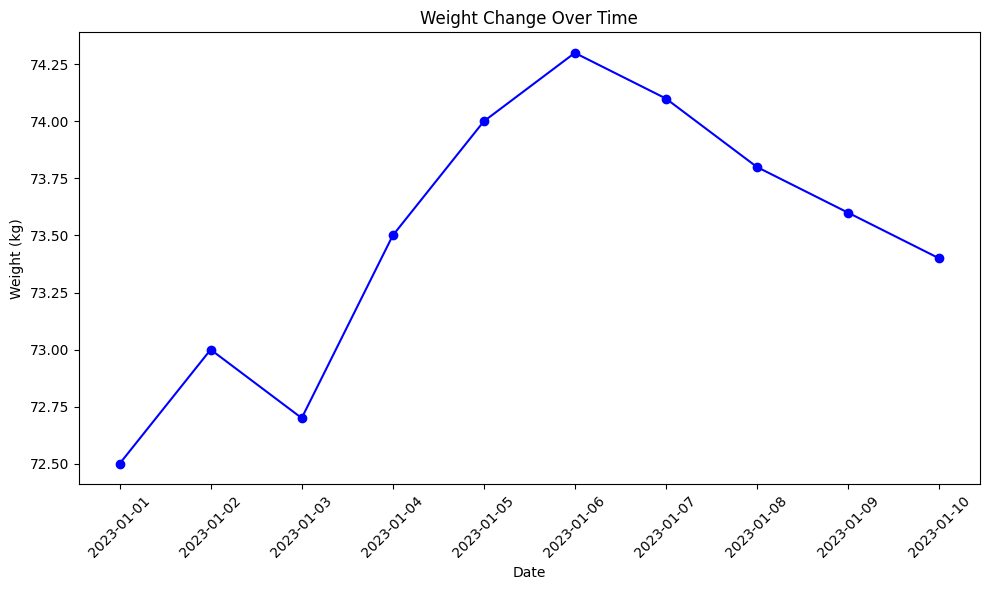

In [87]:
data = {
    'date': pd.date_range(start='2023-01-01', periods=10, freq='D'),  # 生成连续日期数据
    'weight_kg': [72.5, 73.0, 72.7, 73.5, 74.0, 74.3, 74.1, 73.8, 73.6, 73.4]  # 模拟体重数据
}


sully = pd.DataFrame(data)

#绘制折线图，随着日期的变化，体重的变化
#TODO
plt.figure(figsize=(10, 6))
plt.plot(sully['date'], sully['weight_kg'], marker='o', linestyle='-', color='b')
plt.title('Weight Change Over Time')
plt.xlabel('Date')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=45)
plt.tight_layout()  
# plt.show()

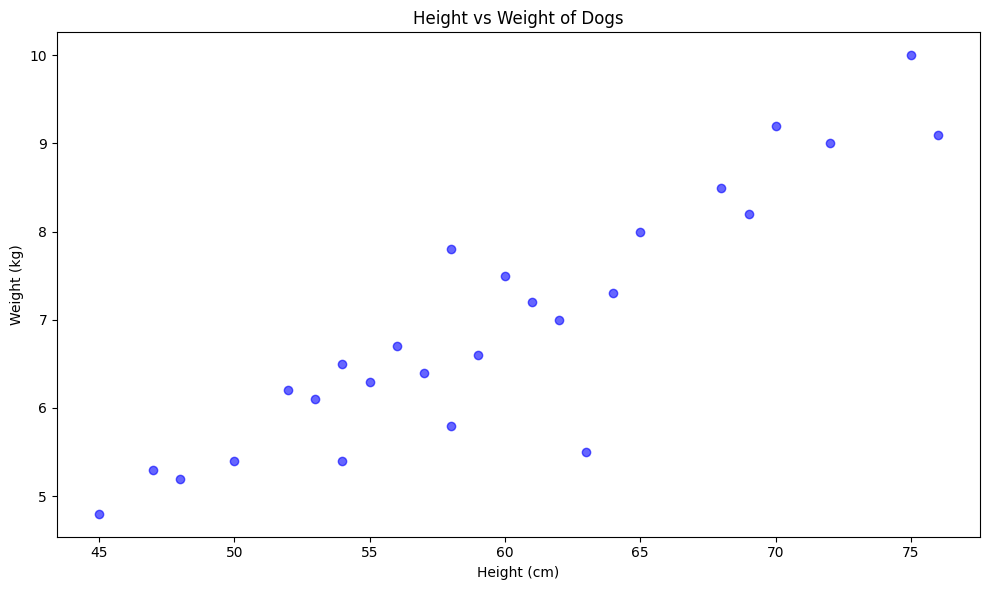

In [88]:
#绘制散点图。针对dog_pack，绘制身高-体重散点图
#TODO
plt.figure(figsize=(10, 6))
plt.scatter(dog_pack['height_cm'], dog_pack['weight_kg'], color='blue', alpha=0.6)
plt.title('Height vs Weight of Dogs')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.tight_layout()  
# plt.show()

# 缺失值处理

In [89]:
data = {
    'name': ['Buddy', 'Bella', 'Max', 'Lucy', np.nan, 'Charlie', 'Daisy'],
    'year': [2015, 2017, 2016, np.nan, 2019, 2015, 2018],
    'weight_kg': [7.5, 6.3, 8.0, 5.4, np.nan, 9.2, 4.8],
    'height_cm': [60, 55, np.nan, 50, 70, 60, 45],
    'breed': ['Labrador', 'Beagle', 'Bulldog', 'Poodle', 'Golden Retriever', 'Dachshund', np.nan],
    'sex': ['M', 'F', 'M', 'F', 'M', 'F', 'F']
}

dog_pack = pd.DataFrame(data)

# 查看原始数据，确认包含缺失值
print("原始数据：")
print(dog_pack)

原始数据：
      name    year  weight_kg  height_cm             breed sex
0    Buddy  2015.0        7.5       60.0          Labrador   M
1    Bella  2017.0        6.3       55.0            Beagle   F
2      Max  2016.0        8.0        NaN           Bulldog   M
3     Lucy     NaN        5.4       50.0            Poodle   F
4      NaN  2019.0        NaN       70.0  Golden Retriever   M
5  Charlie  2015.0        9.2       60.0         Dachshund   F
6    Daisy  2018.0        4.8       45.0               NaN   F


In [90]:
#使用dataframe.isna().any()函数判断dataframe中是否有缺失值,dataframe.isna().sum()检测每列的缺失值的数量
#TODO
has_missing_values = dog_pack.isna().any()  
missing_values_count = dog_pack.isna().sum()  
print(has_missing_values)
print(missing_values_count)

name          True
year          True
weight_kg     True
height_cm     True
breed         True
sex          False
dtype: bool
name         1
year         1
weight_kg    1
height_cm    1
breed        1
sex          0
dtype: int64


In [91]:
#dataframe.dropna()可以删除有缺失值的行
#TODO
cleaned_dog_pack_hang = dog_pack.dropna()

print(cleaned_dog_pack_hang)

      name    year  weight_kg  height_cm      breed sex
0    Buddy  2015.0        7.5       60.0   Labrador   M
1    Bella  2017.0        6.3       55.0     Beagle   F
5  Charlie  2015.0        9.2       60.0  Dachshund   F


In [92]:
#dataframe.fillna(0)将所有有缺失值的行填充为0
#TODO
filled_dog_pack_hang = dog_pack.fillna(0)

print(filled_dog_pack_hang)

      name    year  weight_kg  height_cm             breed sex
0    Buddy  2015.0        7.5       60.0          Labrador   M
1    Bella  2017.0        6.3       55.0            Beagle   F
2      Max  2016.0        8.0        0.0           Bulldog   M
3     Lucy     0.0        5.4       50.0            Poodle   F
4        0  2019.0        0.0       70.0  Golden Retriever   M
5  Charlie  2015.0        9.2       60.0         Dachshund   F
6    Daisy  2018.0        4.8       45.0                 0   F


In [94]:
#当然，你也可以选用其他办法填充缺失值，例如把缺失值填充为该列的非缺失行的平均值
#TODO
# 使用 fillna() 填充缺失值为该列的平均值（仅针对数值型列）
dog_pack['weight_kg'] = dog_pack['weight_kg'].fillna(dog_pack['weight_kg'].mean())
dog_pack['height_cm'] = dog_pack['height_cm'].fillna(dog_pack['height_cm'].mean())
dog_pack['year'] = dog_pack['year'].fillna(dog_pack['year'].mean())
print(dog_pack)

      name         year  weight_kg  height_cm             breed sex
0    Buddy  2015.000000   7.500000  60.000000          Labrador   M
1    Bella  2017.000000   6.300000  55.000000            Beagle   F
2      Max  2016.000000   8.000000  56.666667           Bulldog   M
3     Lucy  2016.666667   5.400000  50.000000            Poodle   F
4      NaN  2019.000000   6.866667  70.000000  Golden Retriever   M
5  Charlie  2015.000000   9.200000  60.000000         Dachshund   F
6    Daisy  2018.000000   4.800000  45.000000               NaN   F


# dataframe与csv

In [95]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [96]:
#dataframe.to_csv将iris_df写入文件金盏花数据集.csv文件
#TODO
iris_df.to_csv('lab1_20241130_iris_data.csv', index=False)

In [97]:
#dataframe.to_excel将iris_df写入金盏花数据集.xlsx文件
#TODO
iris_df.to_excel('lab1_20241130_iris_datairis_data.xlsx', index=False, engine='openpyxl')

In [98]:
#dataframe.to_json将iris_df写入金盏花数据集.json文件
#TODO
iris_df.to_json('lab1_20241130_iris_data.json', orient='records', lines=True)

In [99]:
#使用pandas.read_csv读取金盏花数据集.csv数据文件
#TODO
iris_df = pd.read_csv('lab1_20241130_iris_data.csv')
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
#使用pandas.read_excel读取金盏花数据集.xlsx数据文件
#TODO
iris_df = pd.read_excel('lab1_20241130_iris_data.xlsx', engine='openpyxl')
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [103]:
#使用pandas.read_json读取金盏花数据集.json数据文件
#TODO
iris_df = pd.read_json('lab1_20241130_iris_data.json', lines=True)
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


# 综合
## 任务背景：
你收到了一份包含公司员工的基本数据集，数据包括员工的个人信息（如姓名、年龄、薪资、部门等）。由于数据采集存在问题，数据中包含缺失值、异常值和格式错误。你需要清洗数据、处理异常值、执行数据分析，并进行数据可视化。

## 数据准备：
以下是一个包含脏数据的员工信息数据集。任务中的数据存在：

* 缺失值（如 Age 和 Salary）。
* 异常值（如负数薪资，极端薪资）。
* 格式错误（日期格式）。

## 任务要求

### 1. 数据预处理：

#### 1.1 处理缺失值：
- 检查 `Age` 和 `Salary` 列中的缺失值。
- 对缺失值进行处理：
  - 使用均值填充 `Age` 列的缺失值。
  - 使用中位数填充 `Salary` 列的缺失值。

#### 1.2 处理异常值：
- 识别并处理 `Salary` 列中的异常值（如负值）。将负薪资值替换为 `NaN`，并用该列的中位数填充。

### 2. 数据清洗与转换：

#### 2.1 数据格式转换：
- 将 `JoiningDate` 列的日期字符串转换为 `datetime` 格式，并确保日期格式一致。

#### 2.2 删除重复数据：
- 删除 `EmployeeID` 和 `Name` 列相同的重复数据。

### 3. 数据分析：

#### 3.1 部门薪资分析：
- 使用 `groupby()` 按 `Department` 分组，计算每个部门的平均薪资，并输出结果。

#### 3.2 性别薪资差异分析：
- 使用 `groupby()` 按 `Gender` 分组，计算每个性别的平均薪资，并输出结果。

### 4. 数据可视化：

#### 4.1 部门薪资分布的条形图：
- 绘制每个部门的薪资平均值的条形图。

#### 4.2 薪资与年龄关系的散点图：
- 绘制 `Salary` 和 `Age` 之间的散点图，展示薪资和年龄的关系。


In [105]:
import pandas as pd
import numpy as np


employee_data = {
    'EmployeeID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Heidi', 'Ivan', 'Judy'],
    'Age': [28, 34, 45, 38, np.nan, 50, 29, 31, 40, 60],
    'Salary': [50000, 60000, -7000, 70000, 55000, 75000, 80000, np.nan, 62000, 65000],  # 异常值
    'Department': ['HR', 'IT', 'Finance', 'Finance', 'IT', 'HR', 'HR', 'Finance', 'IT', 'HR'],
    'Gender': ['F', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'F'],
    'JoiningDate': ['2015-06-01', '2016-09-15', '2014-04-23', '2013-07-12', '2017-03-18', '2018-06-21', '2019-01-10', '2020-08-03', '2021-02-19', '2022-01-05']
}


employees = pd.DataFrame(employee_data)



In [106]:
#TODO
# 1.1预处理部分
# 检查Age和Salary列中的缺失值
print("缺失值检查：")
print(employees[['Age', 'Salary']].isna().sum())


employees['Age'].fillna(employees['Age'].mean(), inplace=True)
employees['Salary'].fillna(employees['Salary'].median(), inplace=True)

# 再次检查
print(employees[['Age', 'Salary']].isna().sum())

# 显示填充后的结果
print(employees)

缺失值检查：
Age       1
Salary    1
dtype: int64
Age       0
Salary    0
dtype: int64
   EmployeeID     Name        Age   Salary Department Gender JoiningDate
0         101    Alice  28.000000  50000.0         HR      F  2015-06-01
1         102      Bob  34.000000  60000.0         IT      M  2016-09-15
2         103  Charlie  45.000000  -7000.0    Finance      M  2014-04-23
3         104    David  38.000000  70000.0    Finance      M  2013-07-12
4         105      Eve  39.444444  55000.0         IT      F  2017-03-18
5         106    Frank  50.000000  75000.0         HR      M  2018-06-21
6         107    Grace  29.000000  80000.0         HR      F  2019-01-10
7         108    Heidi  31.000000  62000.0    Finance      F  2020-08-03
8         109     Ivan  40.000000  62000.0         IT      M  2021-02-19
9         110     Judy  60.000000  65000.0         HR      F  2022-01-05


In [107]:
# 1.2处理异常值
employees['Salary'] = employees['Salary'].apply(lambda x: np.nan if x < 0 else x)
# 用Salary列的中位数填充NaN
employees['Salary'].fillna(employees['Salary'].median(), inplace=True)

print(employees)

   EmployeeID     Name        Age   Salary Department Gender JoiningDate
0         101    Alice  28.000000  50000.0         HR      F  2015-06-01
1         102      Bob  34.000000  60000.0         IT      M  2016-09-15
2         103  Charlie  45.000000  62000.0    Finance      M  2014-04-23
3         104    David  38.000000  70000.0    Finance      M  2013-07-12
4         105      Eve  39.444444  55000.0         IT      F  2017-03-18
5         106    Frank  50.000000  75000.0         HR      M  2018-06-21
6         107    Grace  29.000000  80000.0         HR      F  2019-01-10
7         108    Heidi  31.000000  62000.0    Finance      F  2020-08-03
8         109     Ivan  40.000000  62000.0         IT      M  2021-02-19
9         110     Judy  60.000000  65000.0         HR      F  2022-01-05


In [ ]:
# 2.1 数据格式
# 将JoiningDate列转换为datetime格式
employees['JoiningDate'] = pd.to_datetime(employees['JoiningDate'], format='%Y-%m-%d')

print(employees)

   EmployeeID     Name        Age   Salary Department Gender JoiningDate
0         101    Alice  28.000000  50000.0         HR      F  2015-06-01
1         102      Bob  34.000000  60000.0         IT      M  2016-09-15
2         103  Charlie  45.000000  62000.0    Finance      M  2014-04-23
3         104    David  38.000000  70000.0    Finance      M  2013-07-12
4         105      Eve  39.444444  55000.0         IT      F  2017-03-18
5         106    Frank  50.000000  75000.0         HR      M  2018-06-21
6         107    Grace  29.000000  80000.0         HR      F  2019-01-10
7         108    Heidi  31.000000  62000.0    Finance      F  2020-08-03
8         109     Ivan  40.000000  62000.0         IT      M  2021-02-19
9         110     Judy  60.000000  65000.0         HR      F  2022-01-05


In [109]:
# 2.2删除重复数据
employees_delete = employees.drop_duplicates(subset=['EmployeeID', 'Name'], keep='first')

print(employees_delete)

   EmployeeID     Name        Age   Salary Department Gender JoiningDate
0         101    Alice  28.000000  50000.0         HR      F  2015-06-01
1         102      Bob  34.000000  60000.0         IT      M  2016-09-15
2         103  Charlie  45.000000  62000.0    Finance      M  2014-04-23
3         104    David  38.000000  70000.0    Finance      M  2013-07-12
4         105      Eve  39.444444  55000.0         IT      F  2017-03-18
5         106    Frank  50.000000  75000.0         HR      M  2018-06-21
6         107    Grace  29.000000  80000.0         HR      F  2019-01-10
7         108    Heidi  31.000000  62000.0    Finance      F  2020-08-03
8         109     Ivan  40.000000  62000.0         IT      M  2021-02-19
9         110     Judy  60.000000  65000.0         HR      F  2022-01-05


In [110]:
# 3.1 3.2 数据分析
# 按照 'Department' 分组，计算每个部门的平均薪资
department_salary = employees.groupby('Department')['Salary'].mean()
print(department_salary)
# 按照 'Gender' 分组，计算每个性别的平均薪资
gender_salary = employees.groupby('Gender')['Salary'].mean()
print(gender_salary)

Department
Finance    64666.666667
HR         67500.000000
IT         59000.000000
Name: Salary, dtype: float64
Gender
F    62400.0
M    65800.0
Name: Salary, dtype: float64


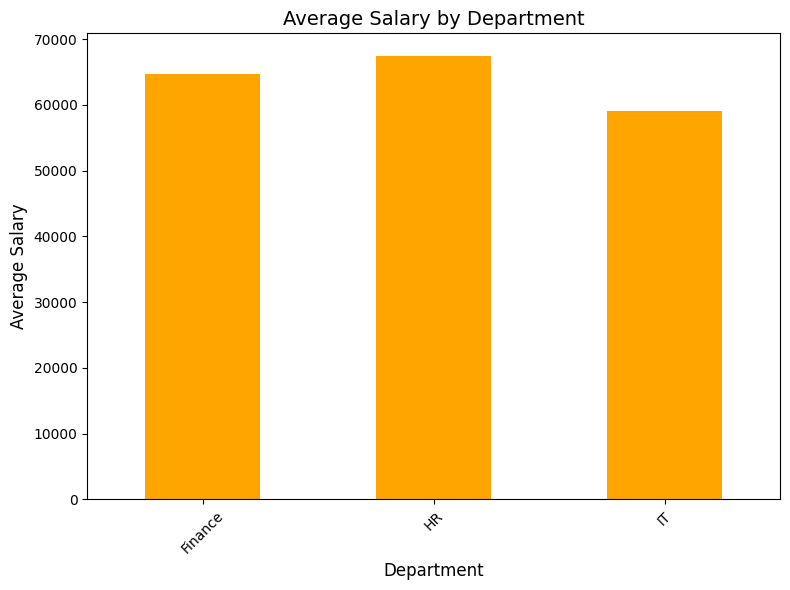

In [114]:
# 4.1 可视化
department_salary = employees_delete.groupby('Department')['Salary'].mean()

plt.figure(figsize=(8, 6))
department_salary.plot(kind='bar', color='orange')

plt.title('Average Salary by Department', fontsize=14)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Salary', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

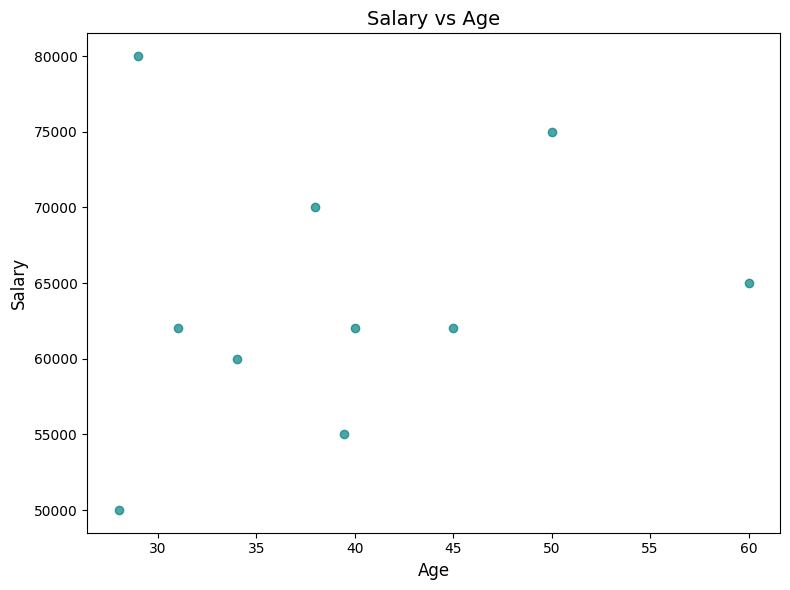

In [113]:
# 4.2 可视化
plt.figure(figsize=(8, 6))
plt.scatter(employees_delete['Age'], employees['Salary'], color='teal', alpha=0.7)
plt.title('Salary vs Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Salary', fontsize=12)

plt.tight_layout()
plt.show()